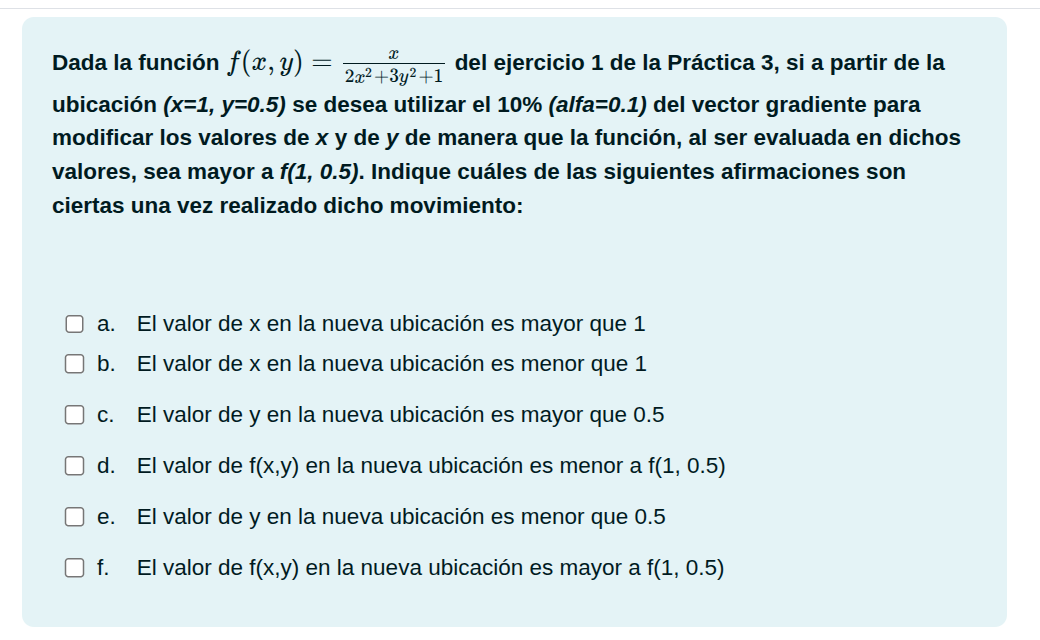

In [3]:
import sympy as sp

x, y = sp.symbols("x y")

f = x / (2 * x**2 + 3 * y**2 + 1)

df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)
grad_f = sp.Matrix([df_dx, df_dy])

x0, y0 = 1, 0.5

grad_at_point = grad_f.subs({x: x0, y: y0}).evalf()
print("Gradiente en (1, 0.5) =", grad_at_point)

alpha = 0.1
x1 = x0 + alpha * grad_at_point[0]
y1 = y0 + alpha * grad_at_point[1]

print("Nueva posición: (", float(x1), ",", float(y1), ")")

f0 = f.subs({x: x0, y: y0}).evalf()
f1 = f.subs({x: x1, y: y1}).evalf()

print("f(1, 0.5) =", f0)
print("f(nueva pos) =", f1)
print("¿f nueva > f(1,0.5)?", f1 > f0)


Gradiente en (1, 0.5) = Matrix([[-0.0177777777777778], [-0.213333333333333]])
Nueva posición: ( 0.9982222222222222 , 0.4786666666666667 )
f(1, 0.5) = 0.266666666666667
f(nueva pos) = 0.271236835137652
¿f nueva > f(1,0.5)? True


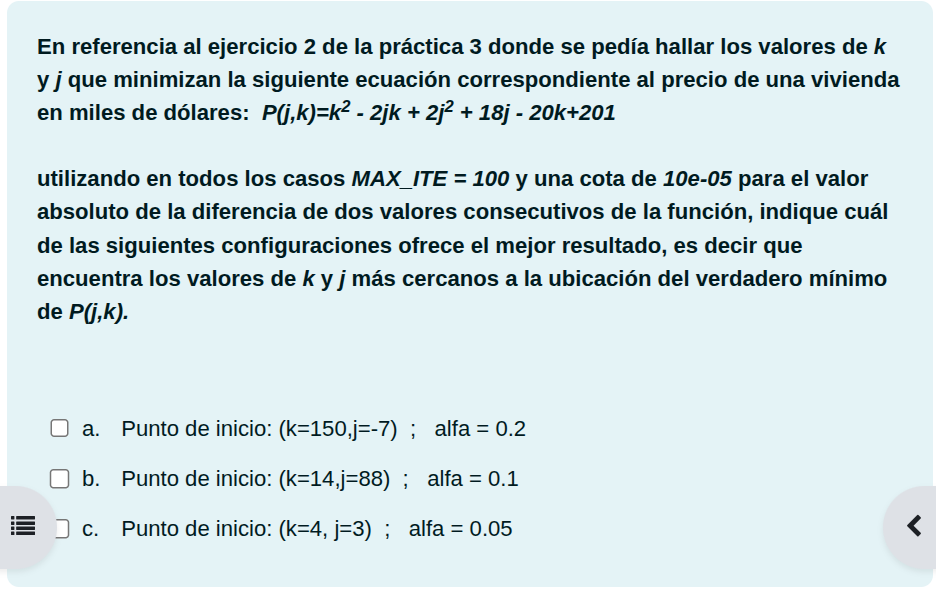

In [ ]:
import sympy as sp

j, k = sp.symbols("j k")
P = k**2 - 2 * j * k + 2 * j**2 + 18 * j - 20 * k + 201

P_grad = [sp.diff(P, j), sp.diff(P, k)]  # gradiente
print(P_grad)


def gradient_descent(
    starting_point, gradient, learning_rate, num_iterations, error_threshold=1e-6
):
    point = sp.Matrix(starting_point)
    for _ in range(num_iterations):
        grad = sp.Matrix(gradient).subs({j: point[0], k: point[1]}).evalf()
        # Restamos el gradiente para minimizar
        point = point - learning_rate * grad
        # Si la longitud del gradiente es menor que el umbral de error, detenemos
        if grad.norm() < error_threshold:
            break
    return point, P.subs({j: point[0], k: point[1]}).evalf()


min_point, min_value = gradient_descent((150, -7), P_grad, 0.2, 100, 10e-05)
print("Paso 1")
print("Mínimo en:", min_point)
print("Valor mínimo:", min_value)
min_point, min_value = gradient_descent((14, 88), P_grad, 0.1, 100, 10e-05)
print("Paso 2")
print("Mínimo en:", min_point)
print("Valor mínimo:", min_value)
min_point, min_value = gradient_descent((4, 3), P_grad, 0.05, 100, 10e-05)
print("Paso 3")
print("Mínimo en:", min_point)
print("Valor mínimo:", min_value)

[4*j - 2*k + 18, -2*j + 2*k - 20]
Paso 1
Mínimo en: Matrix([[1.00005750302573], [11.0000930418501]])
Valor mínimo: 100.000000004570
Paso 2
Mínimo en: Matrix([[1.01345308635397], [11.0217675509743]])
Valor mínimo: 100.000250115854
Paso 3
Mínimo en: Matrix([[0.944058887885954], [10.9094853792302]])
Valor mínimo: 100.004324735525


: 

: 

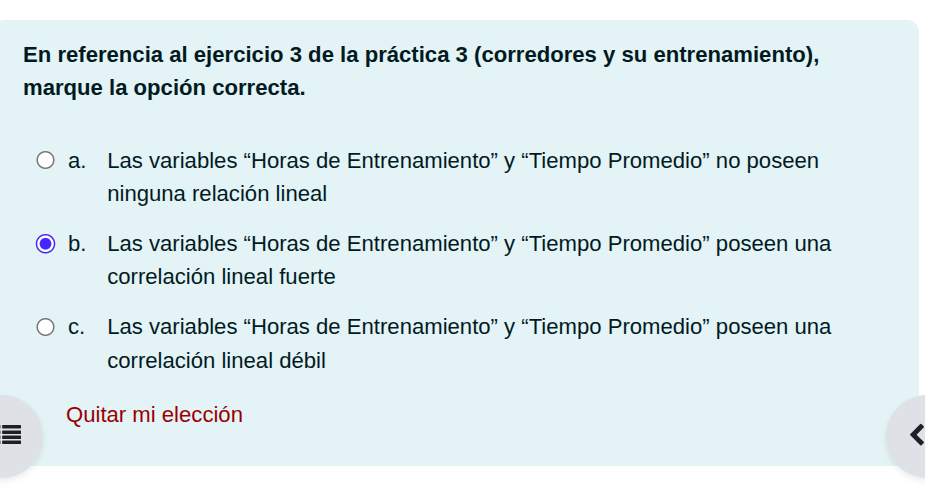

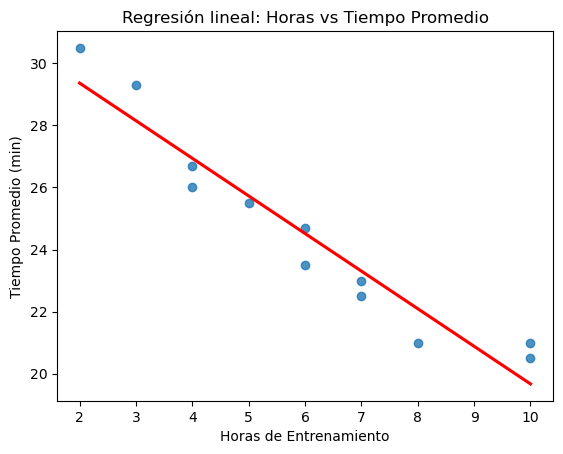

: 

: 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "Horas de Entrenamiento": [2, 3, 4, 4, 5, 6, 6, 7, 7, 8, 10, 10],
    "Tiempo Promedio (min)": [
        30.5,
        29.3,
        26.7,
        26.0,
        25.5,
        24.7,
        23.5,
        23.0,
        22.5,
        21.0,
        21.0,
        20.5,
    ],
}

df = pd.DataFrame(data)

df["Horas de Entrenamiento"].corr(df["Tiempo Promedio (min)"])

sns.regplot(
    x="Horas de Entrenamiento",
    y="Tiempo Promedio (min)",
    data=df,
    ci=None,
    line_kws={"color": "red"},
)
plt.title("Regresión lineal: Horas vs Tiempo Promedio")
plt.show()

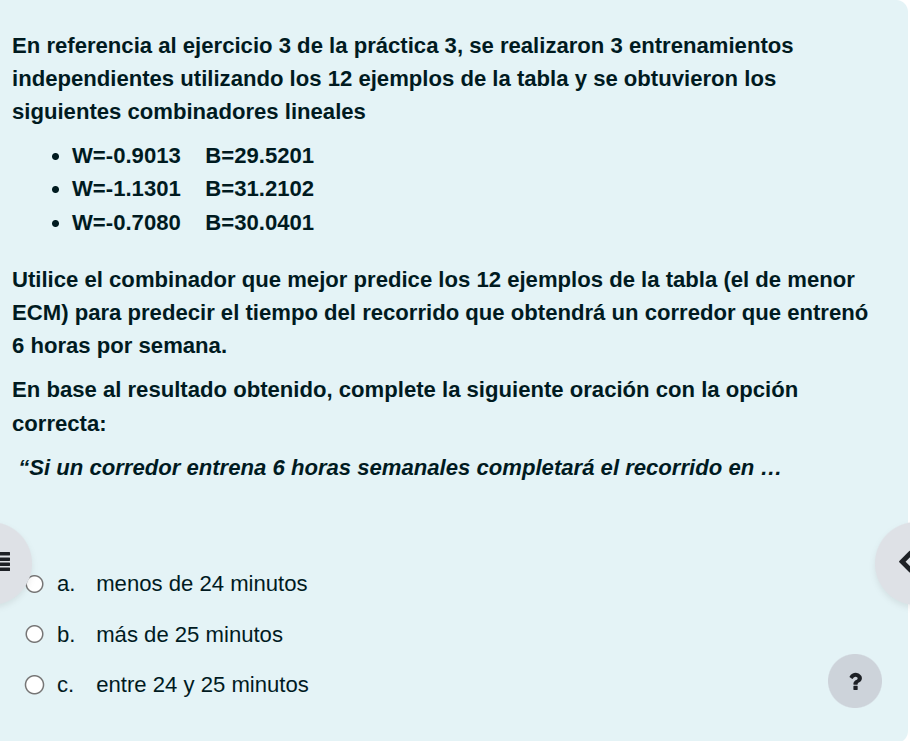

In [ ]:
from ClassNeuronaLineal import NeuronaLineal
from sklearn.metrics import mean_squared_error
x = NeuronaLineal()
x.w_ = -0.9013
x.b_ = 29.5201

predicts = x.predict(df["Horas de Entrenamiento"])
print(mean_squared_error(df["Tiempo Promedio (min)"], predicts))

x = NeuronaLineal()
x.w_ = -1.1301
x.b_ = 31.2102

predicts = x.predict(df["Horas de Entrenamiento"])
print(mean_squared_error(df["Tiempo Promedio (min)"], predicts))

x = NeuronaLineal()
x.w_ = 0.7080
x.b_ = 30.0401

predicts = x.predict(df["Horas de Entrenamiento"])
print(mean_squared_error(df["Tiempo Promedio (min)"], predicts))

1.5000364299999998
0.8037705533333342
118.36628227666665


: 

: 

In [ ]:
x = NeuronaLineal()
x.w_ = -1.1301
x.b_ = 31.2102

x.predict(6)

np.float64(24.4296)

: 

: 

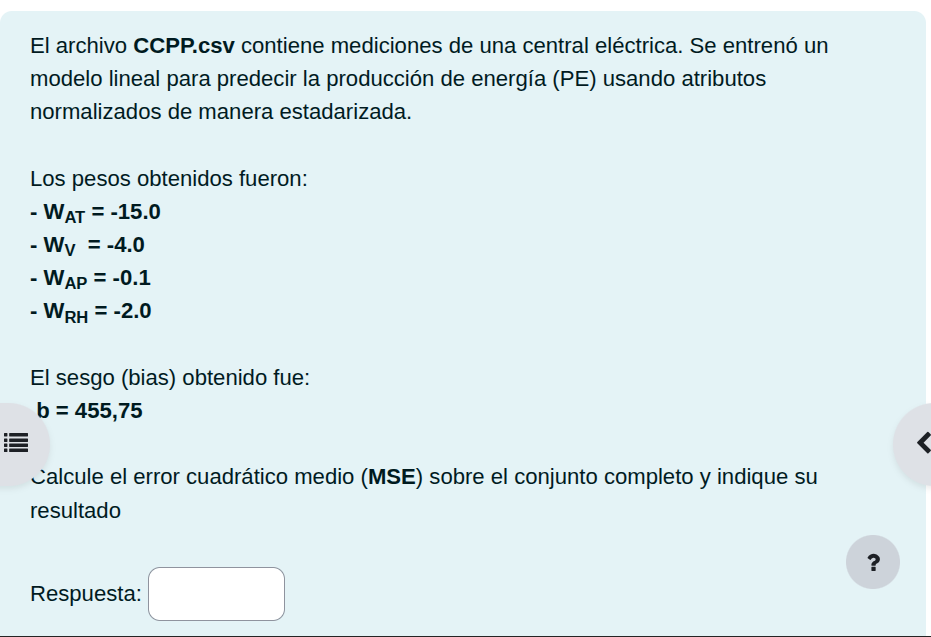

In [ ]:
import pandas as pd 
from ClassNeuronaLineal import NeuronaLineal
from sklearn.metrics import mean_squared_error

df = pd.read_csv("csv/CCPP.csv")

from sklearn.preprocessing import StandardScaler
for col in df.columns:
    if col != "PE":
        scaler = StandardScaler()
        df[[col]] = scaler.fit_transform(df[[col]])

n = NeuronaLineal()
n.w_ = [-15.0, -4.0, -0.1, -2.0]
n.b_ = 455.75

mean_squared_error(df["PE"], n.predict(df.drop("PE", axis=1)))

24.314933598650395

: 

: 

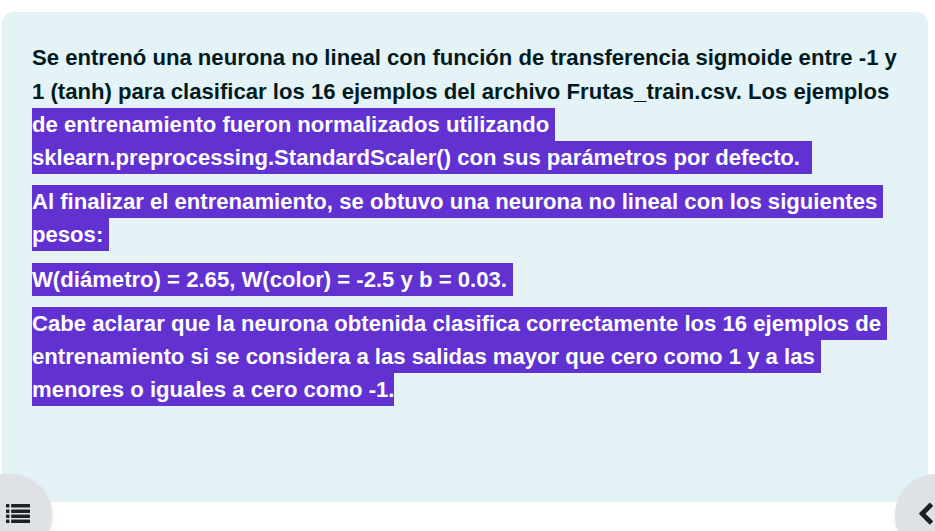

In [ ]:
df = pd.read_csv("csv/FrutasTrain.csv")
import numpy as np

from ClassNeuronaGral import NeuronaGradiente
from sklearn.preprocessing import StandardScaler

scalers = {}
for col in df.columns:
    if col != "Clase":
        scaler = StandardScaler()
        df[[col]] = scaler.fit_transform(df[[col]])
        scalers[col] = scaler
    if col == "Clase":
        df["Clase"] = df["Clase"].map({"Melon": 1, "Naranja": -1})
n = NeuronaGradiente(FUN="tanh")
n.w_ = [2.65, -2.5]
n.b_ = 0.03

mean_squared_error(df["Clase"], n.predict(df.drop("Clase", axis=1)))

y_pred = n.predict_nOut(df.drop("Clase", axis=1))

print(y_pred)
indefinidos = np.sum((y_pred > -0.8) & (y_pred < 0.8))
for num in y_pred:
    print("Numero y si es o no indefinido:", num, (num > -0.8 and num < 0.8))
print("Cantidad de indefinidos:", indefinidos)

[-0.99998554  0.99952321 -0.99994332  0.99999814 -0.99999379  0.99998657
 -0.31958962  0.42408599 -0.18818979  0.88033336 -0.04968874  0.390646
 -0.78355597  0.94953749 -0.99994095  0.99871878]
Numero y si es o no indefinido: -0.999985544663465 False
Numero y si es o no indefinido: 0.9995232120568991 False
Numero y si es o no indefinido: -0.9999433159912224 False
Numero y si es o no indefinido: 0.999998141430174 False
Numero y si es o no indefinido: -0.9999937867325078 False
Numero y si es o no indefinido: 0.9999865686232381 False
Numero y si es o no indefinido: -0.31958961861843704 True
Numero y si es o no indefinido: 0.4240859871201028 True
Numero y si es o no indefinido: -0.18818979369947963 True
Numero y si es o no indefinido: 0.8803333569062914 False
Numero y si es o no indefinido: -0.04968873833398424 True
Numero y si es o no indefinido: 0.39064600080878153 True
Numero y si es o no indefinido: -0.7835559653419968 True
Numero y si es o no indefinido: 0.9495374913555277 False
Numer

: 

: 

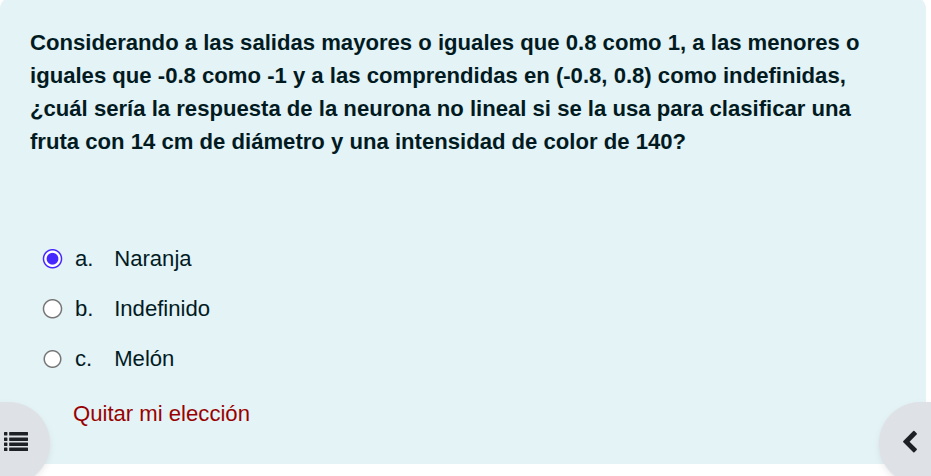

In [ ]:
n.predict_nOut([[scalers['Diametro'].transform([[14]])[0][0], scalers['Color'].transform([[140]])[0][0]]])

/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/home/kelisei/anaconda3/envs/.env/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-0.97270646])

: 

: 

In [ ]:
n.predict_nOut([[scalers['Diametro'].transform([[16]])[0][0], scalers['Color'].transform([[79]])[0][0]]])

NameError: name 'n' is not defined

: 

: 